### RL without markers

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
class Agent():
    def __init__(self,n_predictors,marker,aspiration):
        self.prob_vector = np.random.rand(n_predictors-1)
        self.marker = marker
        self.aspiration = aspiration
        self.action = None
        self.stimulus = None
        self.outcome = None
        
        
    def update_vector(self):
        lr = 10e-2
        ##again, this is for binary, have to be rewritten for other purposes: 
        if self.stimulus > 0:
            if self.action == 0 :
                self.prob_vector[0] += (1-self.prob_vector[0])*lr*self.stimulus
            else:
                self.prob_vector[0] *= (1-lr*self.stimulus) 
        elif self.stimulus < 0:
            if self.action == 0 :
                self.prob_vector[0] += self.prob_vector[0]*lr*self.stimulus
            else:
                self.prob_vector[0] -= (1-self.prob_vector[0])*lr*self.stimulus
        
        if self.prob_vector[0] > 1:
            self.prob_vector[0] = 1
        if self.prob_vector[0] < 0:
            self.prob_vector[0] = 0

In [174]:
class Population():
    def __init__(self,n_agents,payoff_matrix,e):
        self.n_agents = n_agents
        self.payoff_matrix = payoff_matrix
        self.e = e
    
    def add_agents(self,n_predictors,marker_list,aspiration_list):
        self.list_agents = [Agent(n_predictors,marker_list[i],aspiration_list[i]) for i in range(self.n_agents)]
        
    def interaction(self):
        #########introducing_marker_interaction
        if np.random.uniform() < e:
            ##Marked
            pair_agents = np.random.choice([x for x in popula.list_agents if x.marker == np.random.randint(0,2)],2,replace=False)
        else:
        #########
            pair_agents = np.random.choice(popula.list_agents,2,replace=False)
        for agent in pair_agents:
            ## For binary classification, here it should be included a multiclass 
            ###################Action given probability vector###################
            ###############################just_here##############################
            agent.action = int(np.random.uniform() > agent.prob_vector[0])#La buena es la 0
        for i,agent in enumerate(pair_agents):
            agent.outcome = self.payoff_matrix[pair_agents[i].action,pair_agents[abs(i-1)].action]
            numerator = agent.outcome - agent.aspiration
            denominator = max(abs(self.payoff_matrix.flatten()-agent.aspiration))
            agent.stimulus = numerator/denominator
            agent.update_vector()

<ErrorbarContainer object of 3 artists>

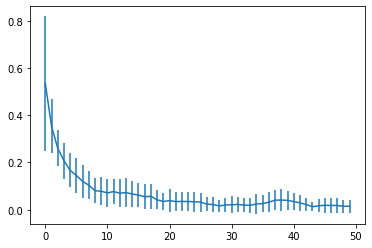

In [175]:
n_agents = 100
e = 0.5
#payoff_matrix = np.eye(2)/2+1
payoff_matrix = np.array([[-1,-1],[-1,1]])
aspiration_list = np.zeros(n_agents)
marker_list = np.random.randint(0,2,size = n_agents)
popula = Population(n_agents,payoff_matrix,e)
popula.add_agents(2,marker_list,aspiration_list)
evol = []
evol_2 = []
i = 0
for i in range(250*n_agents):
    popula.interaction()
    if i%(n_agents*5) == 0:
        evol.append(np.mean([x.prob_vector[0] for x in popula.list_agents]))
        evol_2.append(np.std([x.prob_vector[0] for x in popula.list_agents]))
plt.errorbar(range(len(evol)),evol,yerr=evol_2)